In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [57]:
all_data=pd.read_csv("OMX_Nordic_40.csv")
all_data["Date"]=pd.to_datetime(all_data["Date"],format="%Y-%m-%d")
display(all_data)
# plt.plot(all_data["Date"],all_data["High price"])
# plt.plot(all_data["Date"],all_data["Low price"])
# plt.plot(all_data["Date"],all_data["Closing price"])
# plt.show()

# remove "High price" and "Low price" columns
all_data = all_data.drop(["High price", "Low price"], axis=1)

Date  High price  Low price  Closing price
0    2001-12-28         NaN        NaN        1000.00
1    2002-01-02         NaN        NaN         983.52
2    2002-01-03         NaN        NaN        1024.30
3    2002-01-04         NaN        NaN        1025.50
4    2002-01-07         NaN        NaN        1020.14
...         ...         ...        ...            ...
5679 2024-04-04     2760.12    2739.26        2747.39
5680 2024-04-05     2739.58    2712.48        2738.46
5681 2024-04-08     2764.17    2736.28        2757.69
5682 2024-04-09     2762.93    2735.93        2739.41
5683 2024-04-10     2760.38    2711.88        2742.01

[5684 rows x 4 columns]

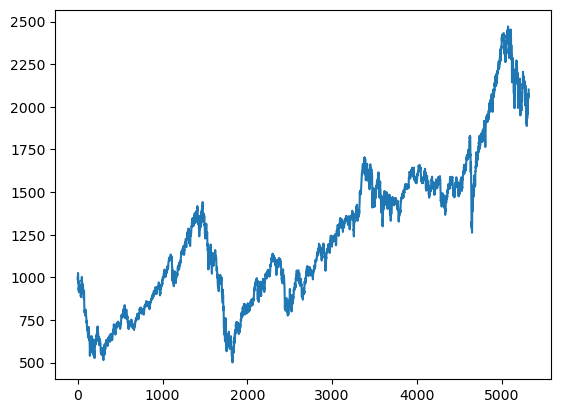

In [58]:
validation_data = all_data["Closing price"].tail(365)
data = all_data["Closing price"].head(-365)
plt.plot(data)
plt.show()

In [59]:
#We notice a few wrong values (fixable), and two series starts only from 2007
#We notice 2008 global crisis and 2020 Covid-19 pandemic. When crisis it is hard to predict... Maybe we should consider only stable periods (i.e. after 2009)? Or maybe go to a more stable scale such as log?

In [60]:
# #Zooming in looking for periodicty
# first_samples=data.head(2000)
# plt.plot(first_samples["Date"],first_samples["Closing price"])
# plt.show()

## Cleaning the data

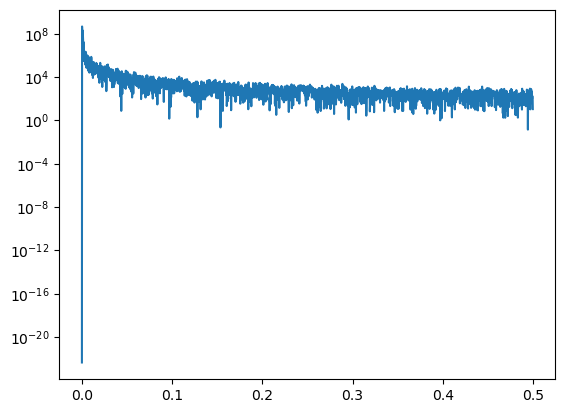

Peaks at 0.00018800526414739614 with power 466942006.292797


In [61]:
from scipy.signal import periodogram
f, Pxx = periodogram(data)
plt.plot(f,Pxx)
plt.yscale("log")
plt.show()
peaks = np.argmax(Pxx)
print(f"Peaks at {f[peaks]} with power {Pxx[peaks]}")

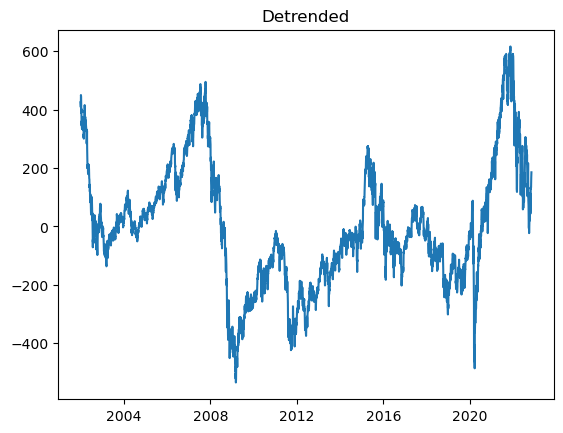

In [62]:
from statsmodels.tsa.tsatools import detrend
detrended = detrend(data)

# from statsmodels.tsa.seasonal import STL

# res = stl.fit()
# detrended = res.trend

plt.plot(all_data["Date"].head(-365), detrended)
plt.title("Detrended")
plt.show()

In [63]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(detrended)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.753357
p-value: 0.065251
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [64]:
# KPSS test
from statsmodels.tsa.stattools import kpss
result = kpss(detrended)
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))


KPSS Statistic: 1.028746
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16552\4109265067.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(detrended)


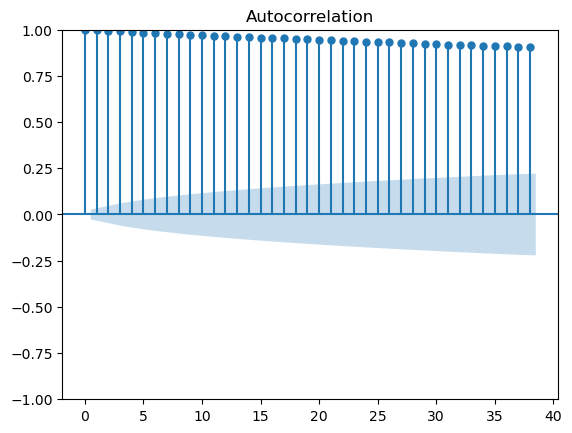

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(detrended)
plt.show()

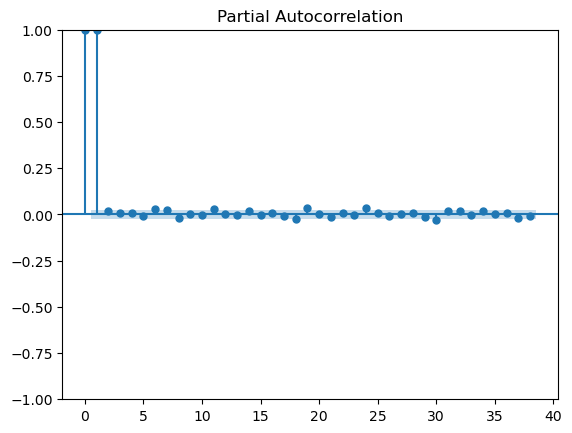

In [66]:
plot_pacf(detrended)
plt.show()

## Differencing

In [67]:
all_data["Closing price diff"] = all_data["Closing price"].diff()

all_data = all_data.dropna()
print(all_data.head(10))

         Date  Closing price  Closing price diff
1  2002-01-02         983.52              -16.48
2  2002-01-03        1024.30               40.78
3  2002-01-04        1025.50                1.20
4  2002-01-07        1020.14               -5.36
5  2002-01-08         983.53              -36.61
6  2002-01-09         978.67               -4.86
7  2002-01-10         965.62              -13.05
8  2002-01-11         979.44               13.82
9  2002-01-14         935.95              -43.49
10 2002-01-15         935.32               -0.63


In [76]:
diff_data = all_data["Closing price diff"].head(-365)
validation_diff_data = all_data["Closing price diff"].tail(365)
diff_data = detrend(diff_data)

# ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(diff_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -23.955123
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [77]:
# KPSS test
from statsmodels.tsa.stattools import kpss
result = kpss(diff_data)
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))


KPSS Statistic: 0.034103
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16552\2174026023.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(diff_data)


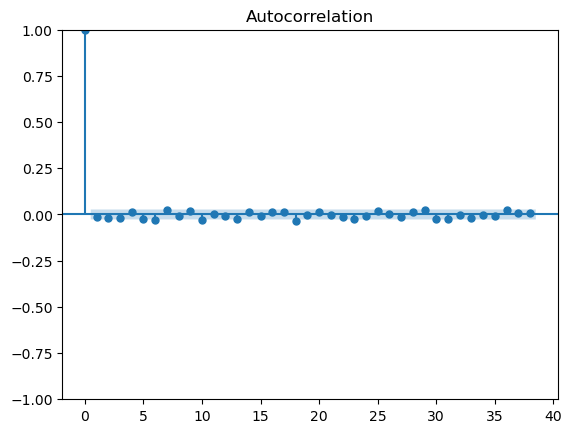

In [70]:
# plot the ACF and PACF
plot_acf(diff_data)
plt.show()

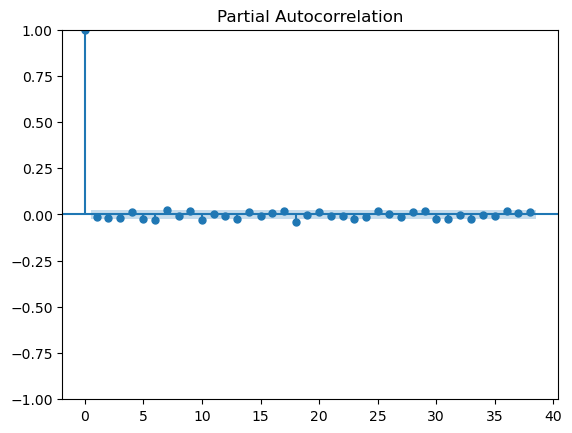

In [71]:
plot_pacf(diff_data)
plt.show()

## Fitting ARMA models

In [72]:
maxp=4
maxq=4

aiccs=np.zeros((maxp+1,maxq+1)) 
aics=np.zeros((maxp+1,maxq+1)) 
bics=np.zeros((maxp+1,maxq+1)) 

for p in range(0,maxp+1):
  for q in range(0,maxq+1):
    model = ARIMA(diff_data, order=(p, 0 ,q)).fit(method= "innovations_mle")
    
    aiccs[p,q]=model.aicc
    aics[p,q]=model.aic
    bics[p,q]=model.bic

d:\ProgramFiles\miniconda\envs\common\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\ProgramFiles\miniconda\envs\common\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\ProgramFiles\miniconda\envs\common\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\ProgramFiles\miniconda\envs\common\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\ProgramFiles\miniconda\envs\common\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported inde

In [73]:
print(aiccs)
best_params = (np.argmin(aiccs) // (maxq+1), np.argmin(aiccs) % (maxq+1))
print(f"Best p: {best_params[0]}\nBest q: {best_params[1]}")

[[44584.22694775 44584.75841628 44585.10989345 44585.48883287
  44586.86812338]
 [44584.81030151 44581.40172828 44583.34089754 44586.67458057
  44588.346434  ]
 [44585.18337649 44583.34191052 44584.78563191 44586.45172796
  44587.85098034]
 [44585.64971424 44588.71690243 44586.45351306 44571.67972095
  44573.57784823]
 [44587.0367718  44588.58428915 44587.5224456  44573.5831563
  44579.16684028]]
Best p: 3
Best q: 3


In [74]:
best_model = ARIMA(diff_data, order=(best_params[0], 0 , best_params[1])).fit(method= "innovations_mle")
print("Best params using innovations")
print("ar:",best_model.arparams)
print("ma:",best_model.maparams)

d:\ProgramFiles\miniconda\envs\common\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\ProgramFiles\miniconda\envs\common\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\ProgramFiles\miniconda\envs\common\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Best params using innovations
ar: [-0.65660048  0.48297892  0.85169903]
ma: [ 0.64507893 -0.4963402  -0.88017421]


In [78]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     Closing price diff   No. Observations:                 5318
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -22277.826
Date:                Fri, 03 May 2024   AIC                          44571.653
Time:                        12:09:45   BIC                          44624.283
Sample:                             0   HQIC                         44590.041
                               - 5318                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.207     -0.006      0.995      -0.407       0.404
ar.L1         -0.6566      0.048    -13.671      0.000      -0.751      -0.562
ar.L2          0.4830      0.069      6.963      0.000       0.347       0.619
ar.L3          0.8517      0.045     18.811      0.000       0.763       0.940
ma.L1          0.6451      0.044     14.557      0.000       0.558       0.732
ma.L2         -0.4963      0.064     -7.814      0.000      -0.621      -0.372
ma.L3         -0.8802      0.042    -20.954      0.000      -0.963      -0.798
sigma2       254.7747      2.773     91.875      0.000     249.340     260.210
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              6453.59
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

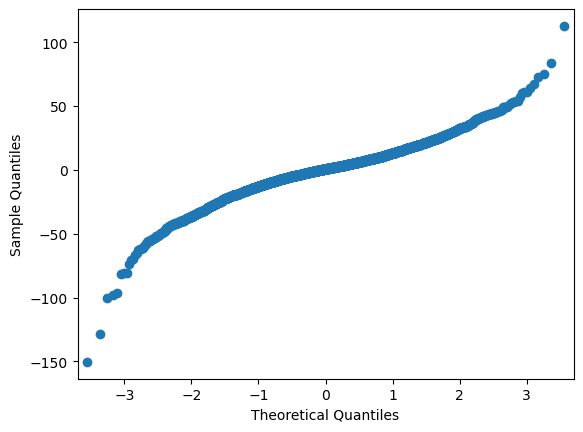

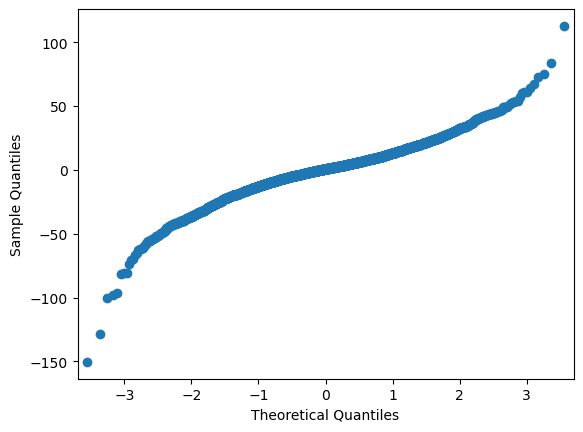

In [79]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import jarque_bera

model_residuals=best_model.resid
qqplot(model_residuals)